<a href="https://colab.research.google.com/github/Kendi798/Climate-Change/blob/main/Climate_Change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###CLIMATE CHANGE
According to the United Nations Environmental Program (UNEP) Sustainable Buildings and Climate Initiative, construction trade contributes as much as 30% to all global greenhouse gas emissions and consumes up to 40% of all energy used worldwide. Climate change is currently having a powerful impact on how buildings are designed and constructed.



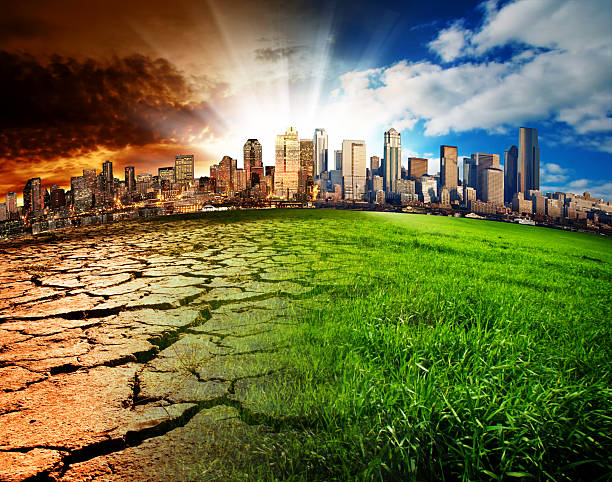

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
Climate=pd.read_csv('/content/drive/MyDrive/Hamoye csv files/ENB2012_data.xlsx - Φύλλο1.csv')
Climate

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [3]:
Climate.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
Climate.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


In [5]:
Climate.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

In [6]:
#Renaming the columns 
Climate_data={'X1':'Relative_Compactness','X2':'Surface_Area','X3':'Wall_Area','X4':'Roof_Area','X5':'Overall_Height','X6':'Orientation','X7':'Glazing_Area','X8':'Glazing_Area_Distribution','Y1':'Heating_Load','Y2':'Cooling_Load'}

In [7]:
Climate=Climate.rename(columns=Climate_data)

In [8]:
#Confirming that the column names have been renamed
Climate.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [9]:
Climate.shape

(768, 10)

In [10]:
Climate.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [11]:
Climate.corr()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
Relative_Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
Surface_Area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
Wall_Area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
Roof_Area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
Overall_Height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889431,0.895785
Orientation,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
Glazing_Area,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269841,0.207505
Glazing_Area_Distribution,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Heating_Load,6.222722e-01,-6.581202e-01,4.556712e-01,-8.618283e-01,8.894307e-01,-2.586534e-03,2.698410e-01,8.736759e-02,1.000000,0.975862
Cooling_Load,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


In [12]:
Climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [13]:
# Find the highet and lowest heating load
highest_load = Climate['Heating_Load'].max()
lowest_load = Climate['Heating_Load'].min()

print("Highest heating load:", highest_load)
print("Lowest heating load:", lowest_load)

Highest heating load: 43.1
Lowest heating load: 6.01


In [14]:
# Find the highest and lowest cooling load
highest_load = Climate['Cooling_Load'].max()
lowest_load = Climate['Cooling_Load'].min()

print("Highest cooling load:", highest_load)
print("Lowest cooling load:", lowest_load)

Highest cooling load: 48.03
Lowest cooling load: 10.9


With the above we are checking to see the highest and lowest heating and cooling rate to get an understanding of the dataset where we see that there is a main difference of 4 for both highest and lowest.Meaning the cooling rate is more than the heating rate.

##EXPLORATORY DATA ANALYSIS - EDA
#1) Univariate



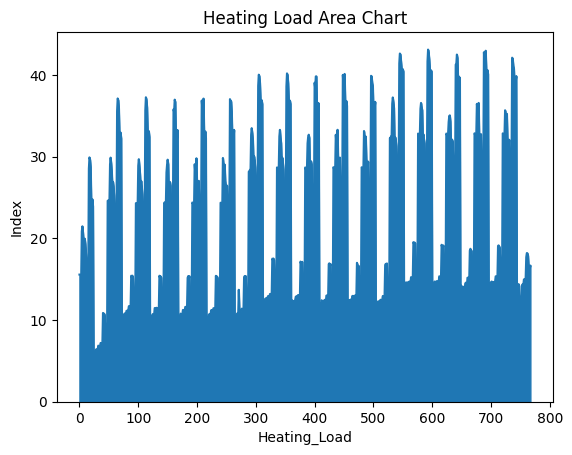

In [15]:
# Plot area chart for heating load
Climate['Heating_Load'].plot.area()

# Set the x-axis label
plt.xlabel('Heating_Load')

# Set the y-axis label
plt.ylabel('Index')

# Set the title of the plot
plt.title('Heating Load Area Chart')

# Display the plot
plt.show()

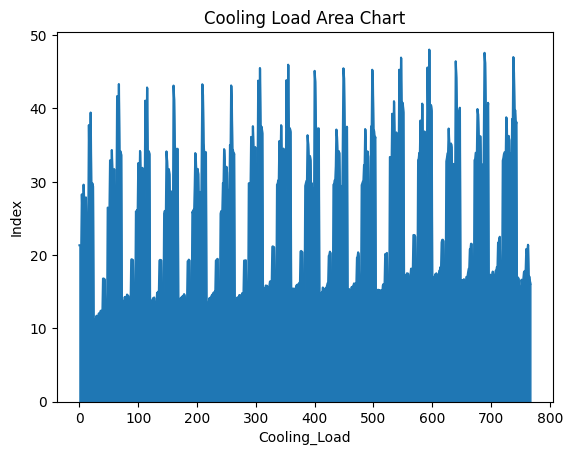

In [16]:
# Plot area chart for heating load
Climate['Cooling_Load'].plot.area()

# Set the x-axis label
plt.xlabel('Cooling_Load')

# Set the y-axis label
plt.ylabel('Index')

# Set the title of the plot
plt.title('Cooling Load Area Chart')

# Display the plot
plt.show()

<ipython-input-17-08f979a77396>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Climate["Relative_Compactness"])


<Axes: xlabel='Relative_Compactness', ylabel='Density'>

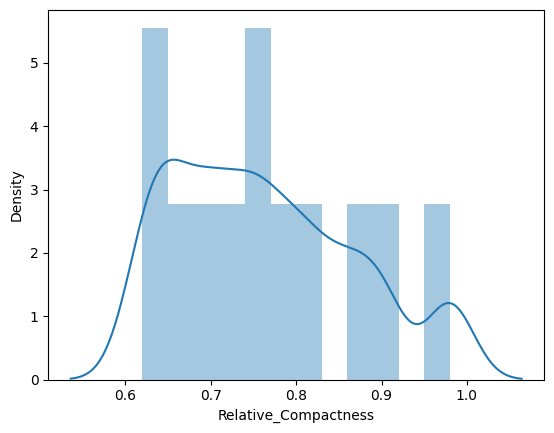

In [17]:
sns.distplot(Climate["Relative_Compactness"])

#2) Bivariate

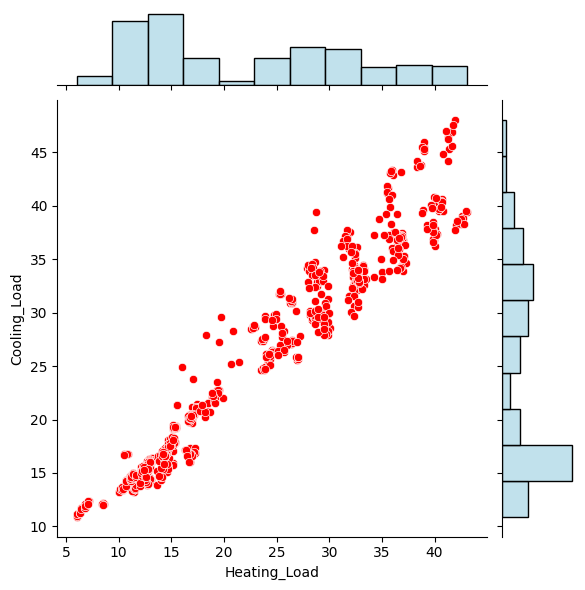

In [18]:
sns.jointplot(x = 'Heating_Load', y = 'Cooling_Load', data = Climate, color='lightblue', joint_kws={'color': 'r'})

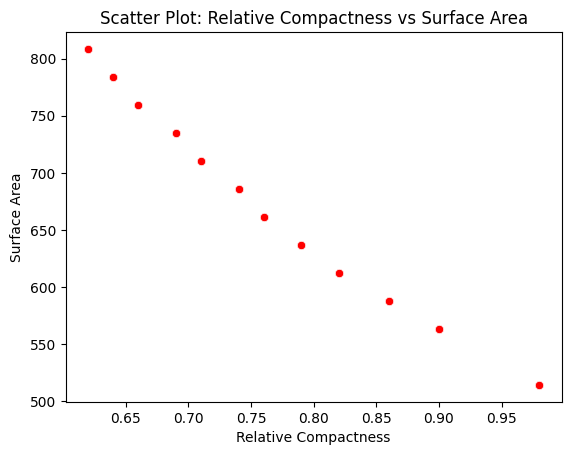

In [19]:
sns.scatterplot(x='Relative_Compactness', y='Surface_Area', data=Climate, color='red')

plt.xlabel('Relative Compactness')
plt.ylabel('Surface Area')
plt.title('Scatter Plot: Relative Compactness vs Surface Area')

plt.show()

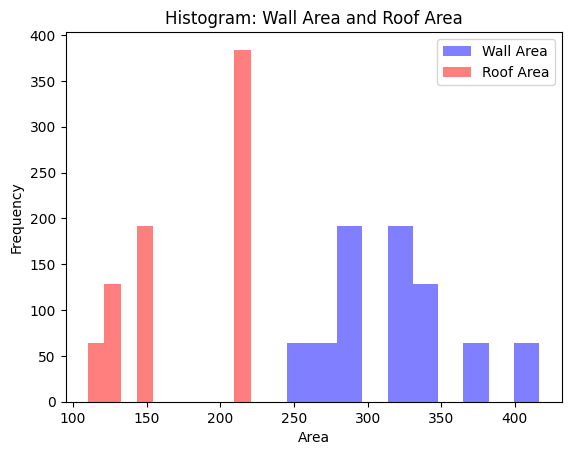

In [20]:
plt.hist(Climate['Wall_Area'], bins=10, alpha=0.5, label='Wall Area',color='blue')
plt.hist(Climate['Roof_Area'], bins=10, alpha=0.5, label='Roof Area',color='red')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.title('Histogram: Wall Area and Roof Area')
plt.legend()
plt.show()

#3) Multivariate

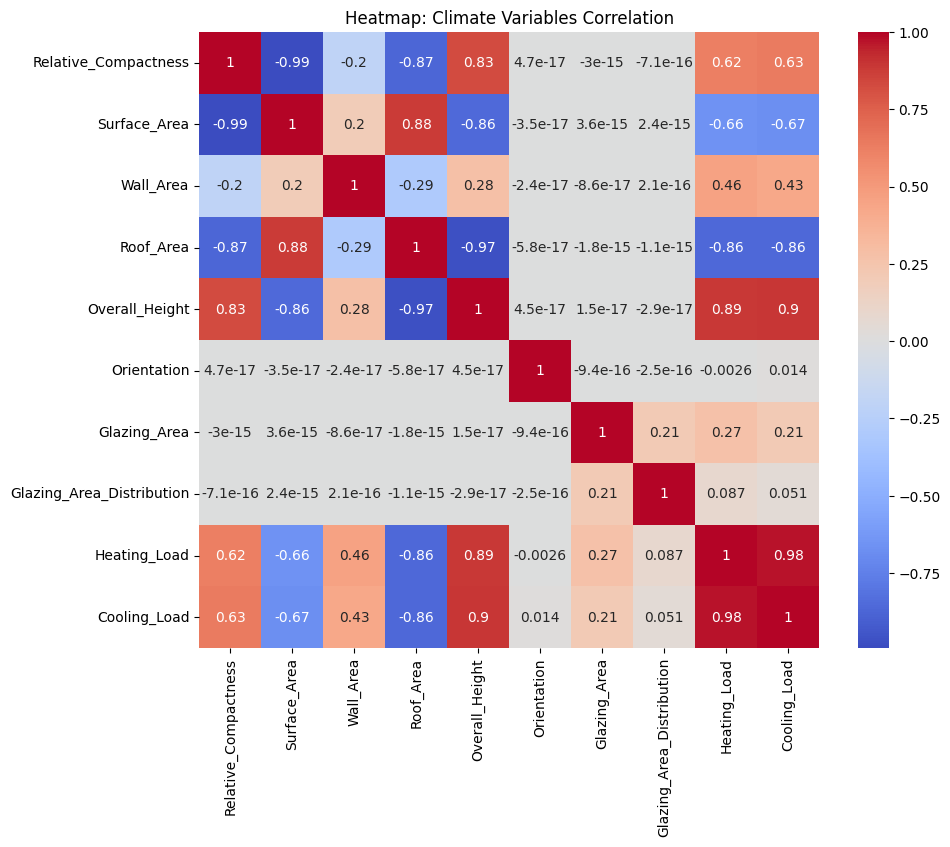

In [21]:
#Creating a heatmap for the dataset
corr_matrix = Climate.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title('Heatmap: Climate Variables Correlation')
plt.show()

There is a strong correlation between relative compactness and surface area, relative compactness and overall height, surface area and roof area while the variables in the dummy dataset are seen to be independent of each other.

###IMPLEMENTING THE SOLUTION
LINEAR REGRESSION

In [22]:
#Assigning the feature variable
X = Climate['Relative_Compactness']
y = Climate['Cooling_Load']

In [23]:
#Splitting the data into train 80% and test 20%
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.8, test_size = 0.2, random_state = 100 )

In [24]:
#Checking the shape of the train and test
print(X_train.shape)
print(y_train.shape)
print( X_test.shape )
print( y_test.shape )

(614,)
(614,)
(154,)
(154,)


<Axes: xlabel='Relative_Compactness', ylabel='Cooling_Load'>

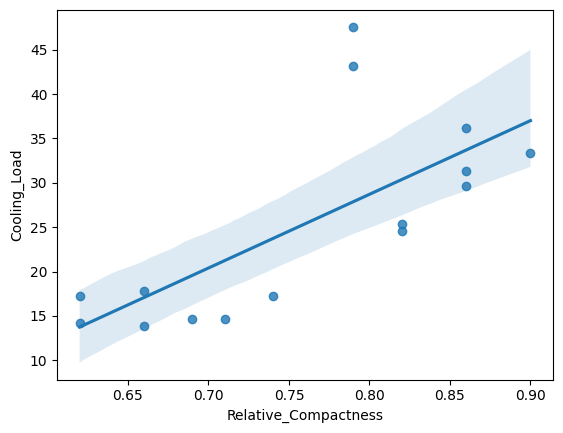

In [25]:
simple_linear_reg_Climate=Climate[["Relative_Compactness","Cooling_Load"]].sample(15,random_state=2)
sns.regplot(x="Relative_Compactness",y="Cooling_Load",data=simple_linear_reg_Climate)

In [26]:
import statsmodels.api as sm
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [27]:
lr.params

const                  -18.640164
Relative_Compactness    56.665045
dtype: float64

In [28]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Cooling_Load   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     403.1
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           2.94e-69
Time:                        11:22:40   Log-Likelihood:                -2103.9
No. Observations:                 614   AIC:                             4212.
Df Residuals:                     612   BIC:                             4221.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -18.6402      2.173     -8.577      0.000     -22.908     -14.372
Relative_Compactness    56.6650      2.822     20.076      0.000      51.122      62.208
==============================================================================
Omnibus:                       55.219   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.425
Skew:                           0.813   Prob(JB):                     1.39e-15
Kurtosis:                       3.174   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Above output shows that the data is not normally distributed


In [29]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)
# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [30]:
#Mean squared error value
print("RMSE: ",np.sqrt( mean_squared_error( y_test, y_pred ) ))

RMSE:  6.954159543287575
